In [47]:
import json
import numpy as np
# from sklearn.linear_model import LogisticRegression
import csv
import pandas as pd
from function import normalize
# from scipy.optimize import minimize

In [48]:
def transform_x52(value):
    return -value



In [49]:
df = pd.read_csv(f'../new_export.csv')
# Áp dụng hàm biến đổi cho cột x52
df['x52'] = df['x52'].apply(transform_x52)
X = df[['x11', 'x12', 'x21', 'x22', 'x23', 'x24', 'x31', 'x32', 'x41', 'x42', 'x43', 'x51', 'x52', 'x61', 'x71', 'x72']].values
y = df['label'].values

Y = np.array([[y[i]/1.0] for i in range(len(y)) ])

In [50]:
# clf = LogisticRegression(multi_class='multinomial', random_state=0)
# clf.fit(X, y)
# theta = clf.coef_
# # theta = theta.reshape(-1, 1)

In [51]:
def sigmoid(z): 
    '''
    Input:
        z: is the input (can be a scalar or an array)
    Output:
        h: the sigmoid of z
    '''   
    # calculate the sigmoid of z
    h = 1 / (1 + np.exp(-z))
    ### END CODE HERE ###
    
    return h

In [52]:
def gradientDescent(x, y, theta, alpha, num_iters, lambda_reg):
    m = x.shape[0]
    n = x.shape[1]

    for i in range(0, num_iters):
        z = np.dot(x, theta)
        h = sigmoid(z)
        # Calculate the regularized cost function
        J = -1.0 / m * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h))) + (lambda_reg / (2 * m)) * np.sum(theta[1:]**2)
        # Update the weights theta with regularization
        gradient = (1 / m) * np.dot(x.T, (h - y))
        regularization_term = (lambda_reg / m) * theta
        regularization_term[0] = 0  # Exclude regularization for the bias term
        theta = theta - alpha * (gradient + regularization_term)
    J = float(J)
    return J, theta

In [53]:
X

array([[850, 749, 700, ..., 300, 617, 690],
       [850, 769, 300, ..., 316, 554, 690],
       [850, 752, 300, ..., 850, 556, 690],
       ...,
       [300, 679, 300, ..., 300, 300, 690],
       [300, 691, 300, ..., 300, 300, 690],
       [300, 716, 300, ..., 300, 300, 690]])

In [54]:
Y

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [55]:
J, theta = gradientDescent(X, Y, np.zeros((16, 1)), 1e-7, 1000, 0.01)

/tmp/ipykernel_2372386/4152779544.py:9: RuntimeWarning: divide by zero encountered in log
  J = -1.0 / m * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h))) + (lambda_reg / (2 * m)) * np.sum(theta[1:]**2)


/tmp/ipykernel_2372386/4152779544.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J = float(J)


In [56]:
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is nan.
The resulting vector of weights is [0.08808681, 0.1016884, 0.07036441, 0.0701263, 0.06711546, 0.06468246, 0.06955364, 0.06820497, 0.09500403, 0.1180534, 0.11780698, 0.04559145, -0.04058906, 0.06917199, 0.0693665, 0.09624333]


[array([0.08808681, 0.1016884 ]), array([0.07036441, 0.0701263 , 0.06711546, 0.06468246]), array([0.06955364, 0.06820497]), array([0.09500403, 0.1180534 , 0.11780698]), array([ 0.04559145, -0.04058906]), array([0.06917199]), array([0.0693665 , 0.09624333])]


array([0.16213576, 0.23263166, 0.11769501, 0.28267628, 0.00427382,
       0.05909756, 0.1414899 ])

[array([0.46416396, 0.53583604]),
 array([0.25841845, 0.257544  , 0.24648647, 0.23755108]),
 array([0.50489503, 0.49510497]),
 array([0.28713885, 0.35680297, 0.35605819]),
 array([9.11393943, 8.11393943]),
 array([1.]),
 array([0.41885497, 0.58114503])]

In [66]:
# final_b = fn_combined_features(final_b)

In [67]:
from collections import defaultdict


def check_acc(label, score):
    if label == 1:
        if score >= 300 and score <= 580:
            return True
        else:
            return False
    if label == 2:
        if score > 580 and score <= 670:
            return True
        else:
            return False
    if label == 3:
        if score > 670 and score <= 740:
            return True
        else:
            return False
    if label == 4:
        if score > 740 and score <= 800:
            return True
        else:
            return False
    if label == 5:
        if score > 800 and score <= 850:
            return True
        else:
            return False


In [68]:
from function.valuate import valuate

In [69]:
accuracy_list = valuate(theta)

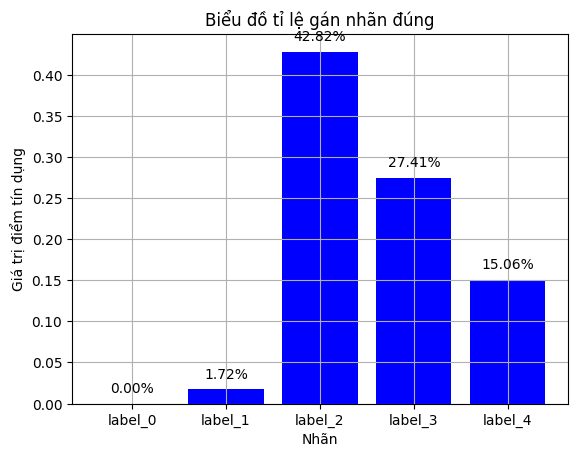

In [70]:
import matplotlib.pyplot as plt

label_name = ['label_0','label_1', 'label_2','label_3', 'label_4']
# accuracy_list = [count[tmp]/count_label[tmp] for tmp in count_label]
indices = list(range(1, len(accuracy_list) + 1))

# Vẽ biểu đồ cột
plt.bar(indices, accuracy_list, color='blue')

plt.title('Biểu đồ tỉ lệ gán nhãn đúng')
plt.xlabel('Nhãn')
plt.ylabel('Giá trị điểm tín dụng')

for i, v in enumerate(accuracy_list):
    plt.text(i + 1, v + 0.01, f'\n{v*100:.2f}%', ha='center', va='bottom', color='black')

# Đặt nhãn trục x
plt.xticks(indices, label_name)
plt.grid(True)
plt.show()
